In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)

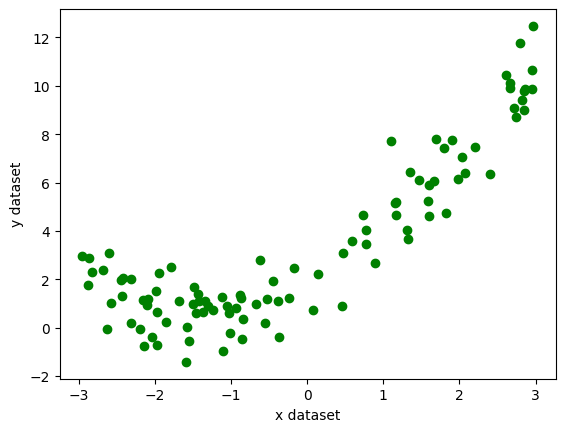

In [137]:
plt.scatter(x, y, color='green')
plt.xlabel('x dataset')
plt.ylabel('y dataset')
plt.show()

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [139]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [140]:
regression.fit(x_train, y_train)

LinearRegression()

In [141]:
y_pred = regression.predict(x_test)

In [142]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)

In [143]:
score

0.7894920995510915

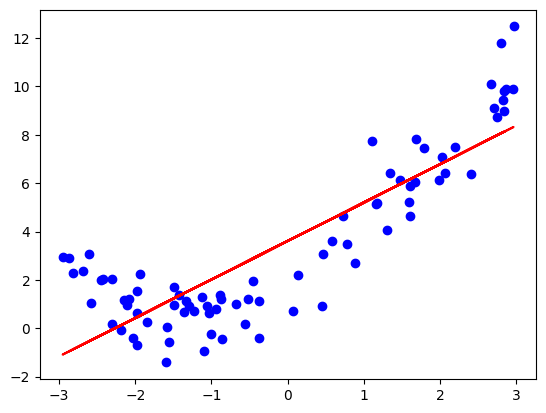

In [144]:
plt.plot(x_train, regression.predict(x_train), color='red')
plt.scatter(x_train, y_train, color='blue')
plt.show()

## Let's apply polynomial transformation

In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
poly = PolynomialFeatures(degree=2, include_bias = True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [147]:
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train_poly, y_train)
y_pred=model.predict(x_test_poly)
score=r2_score(y_test, y_pred)
score

0.9136021296097967

In [148]:
model.coef_

array([[0.        , 1.48118718, 0.54143769]])

In [149]:
model.intercept_

array([1.74739362])

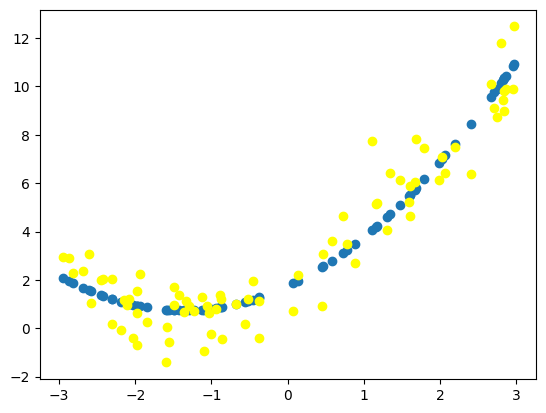

In [150]:
plt.scatter(x=x_train, y=model.predict(x_train_poly))
plt.scatter(x_train, y_train, color='yellow')

### For Polynomial Degree = 3

In [151]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [152]:
model2 = LinearRegression()
model2.fit(x_train_poly, y_train)
y_pred = model2.predict(x_test_poly)
score = r2_score(y_test, y_pred)
score

0.8884222298569512

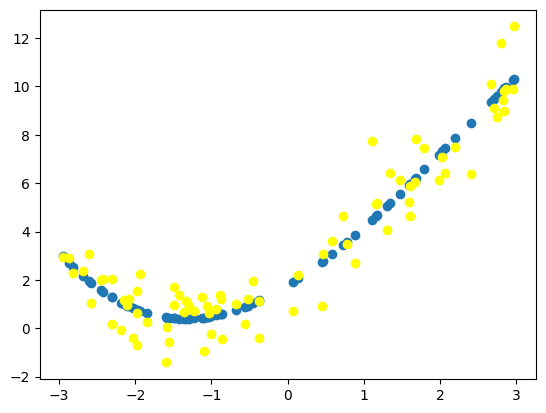

In [153]:
plt.scatter(x_train, model2.predict(x_train_poly))
plt.scatter(x_train, y_train, color='yellow')

### Prediction for new data

In [154]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)

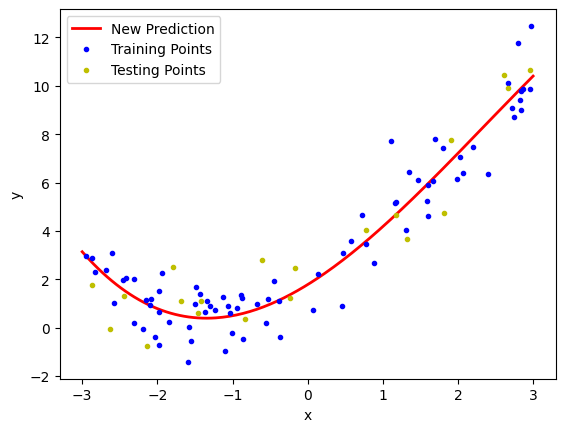

In [155]:
y_new = model2.predict(x_new_poly)
plt.plot(x_new, y_new, 'r-', linewidth=2, label='New Prediction')
plt.plot(x_train, y_train, 'b.', label='Training Points')
plt.plot(x_test, y_test, 'y.', label='Testing Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## PIPLINE CONCEPTS

In [156]:
from sklearn.pipeline import Pipeline

In [166]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)

    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_reg.fit(x_train, y_train)
    y_pred_new = poly_reg.predict(x_new)

    plt.plot(x_new, y_pred_new, 'r', label='Degree' + str(degree), linewidth=3)
    plt.plot(x_train, y_train, 'b.', label='Training Points', linewidth=3)
    plt.plot(x_test, y_test, 'y.', label='Testing Points', linewidth=3)
    plt.legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Degree {degree}')
    plt.axis([-4, 4, 0, 10])
    

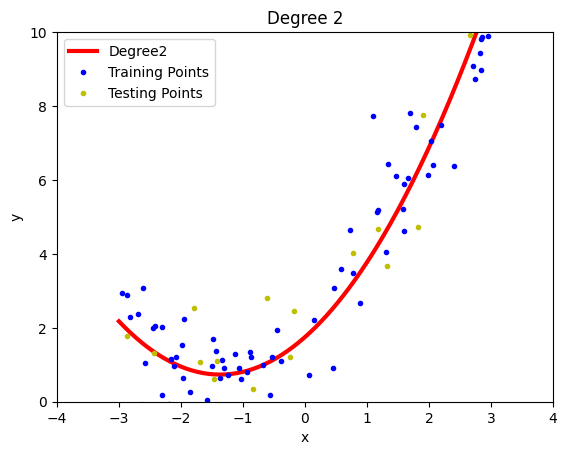

In [167]:
poly_regression(2)

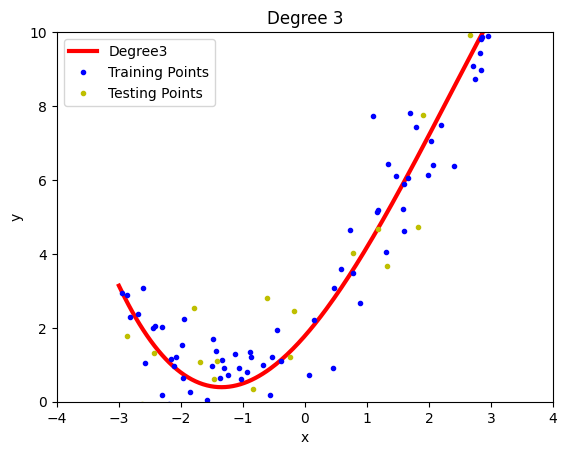

In [168]:
poly_regression(3)

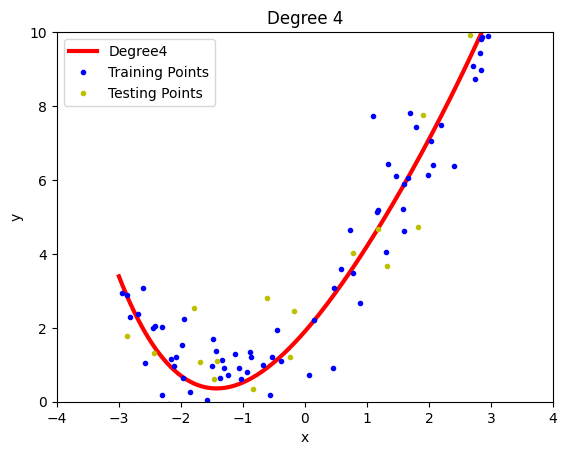

In [169]:
poly_regression(4)

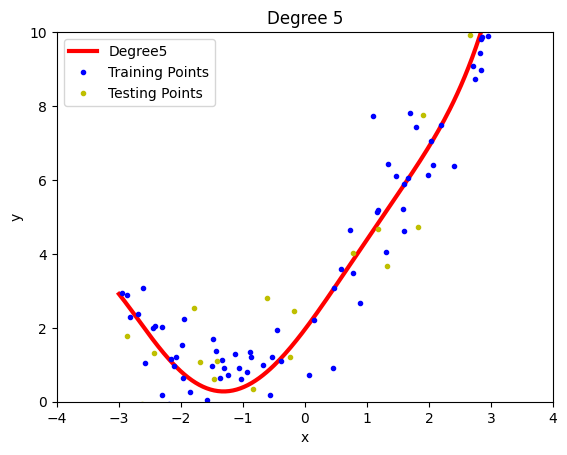

In [170]:
poly_regression(5)

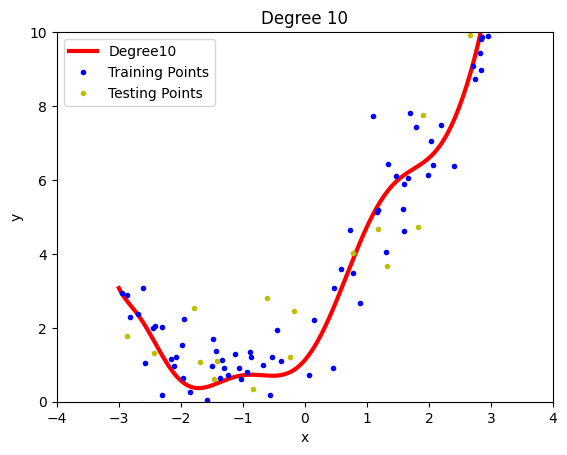

In [171]:
poly_regression(10)

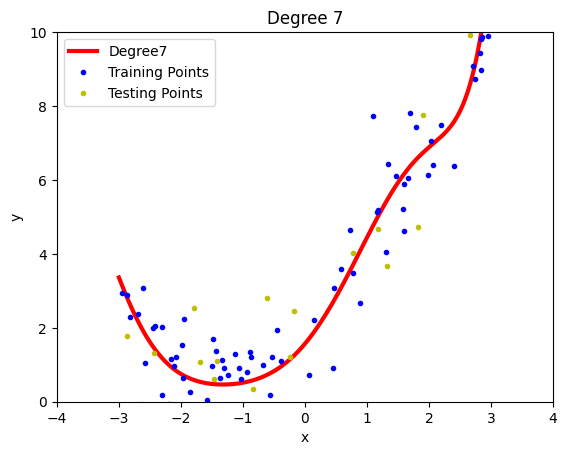

In [172]:
poly_regression(7)

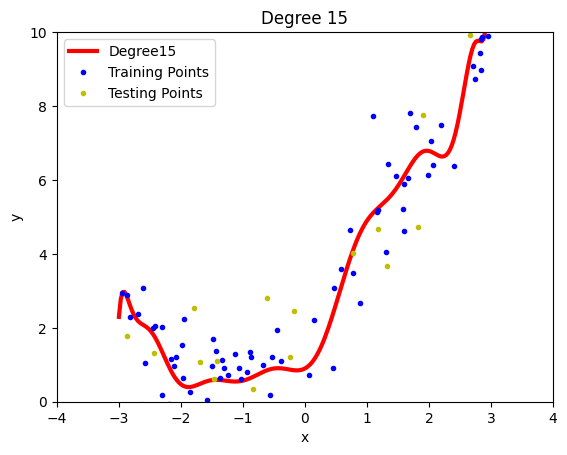

In [173]:
poly_regression(15)

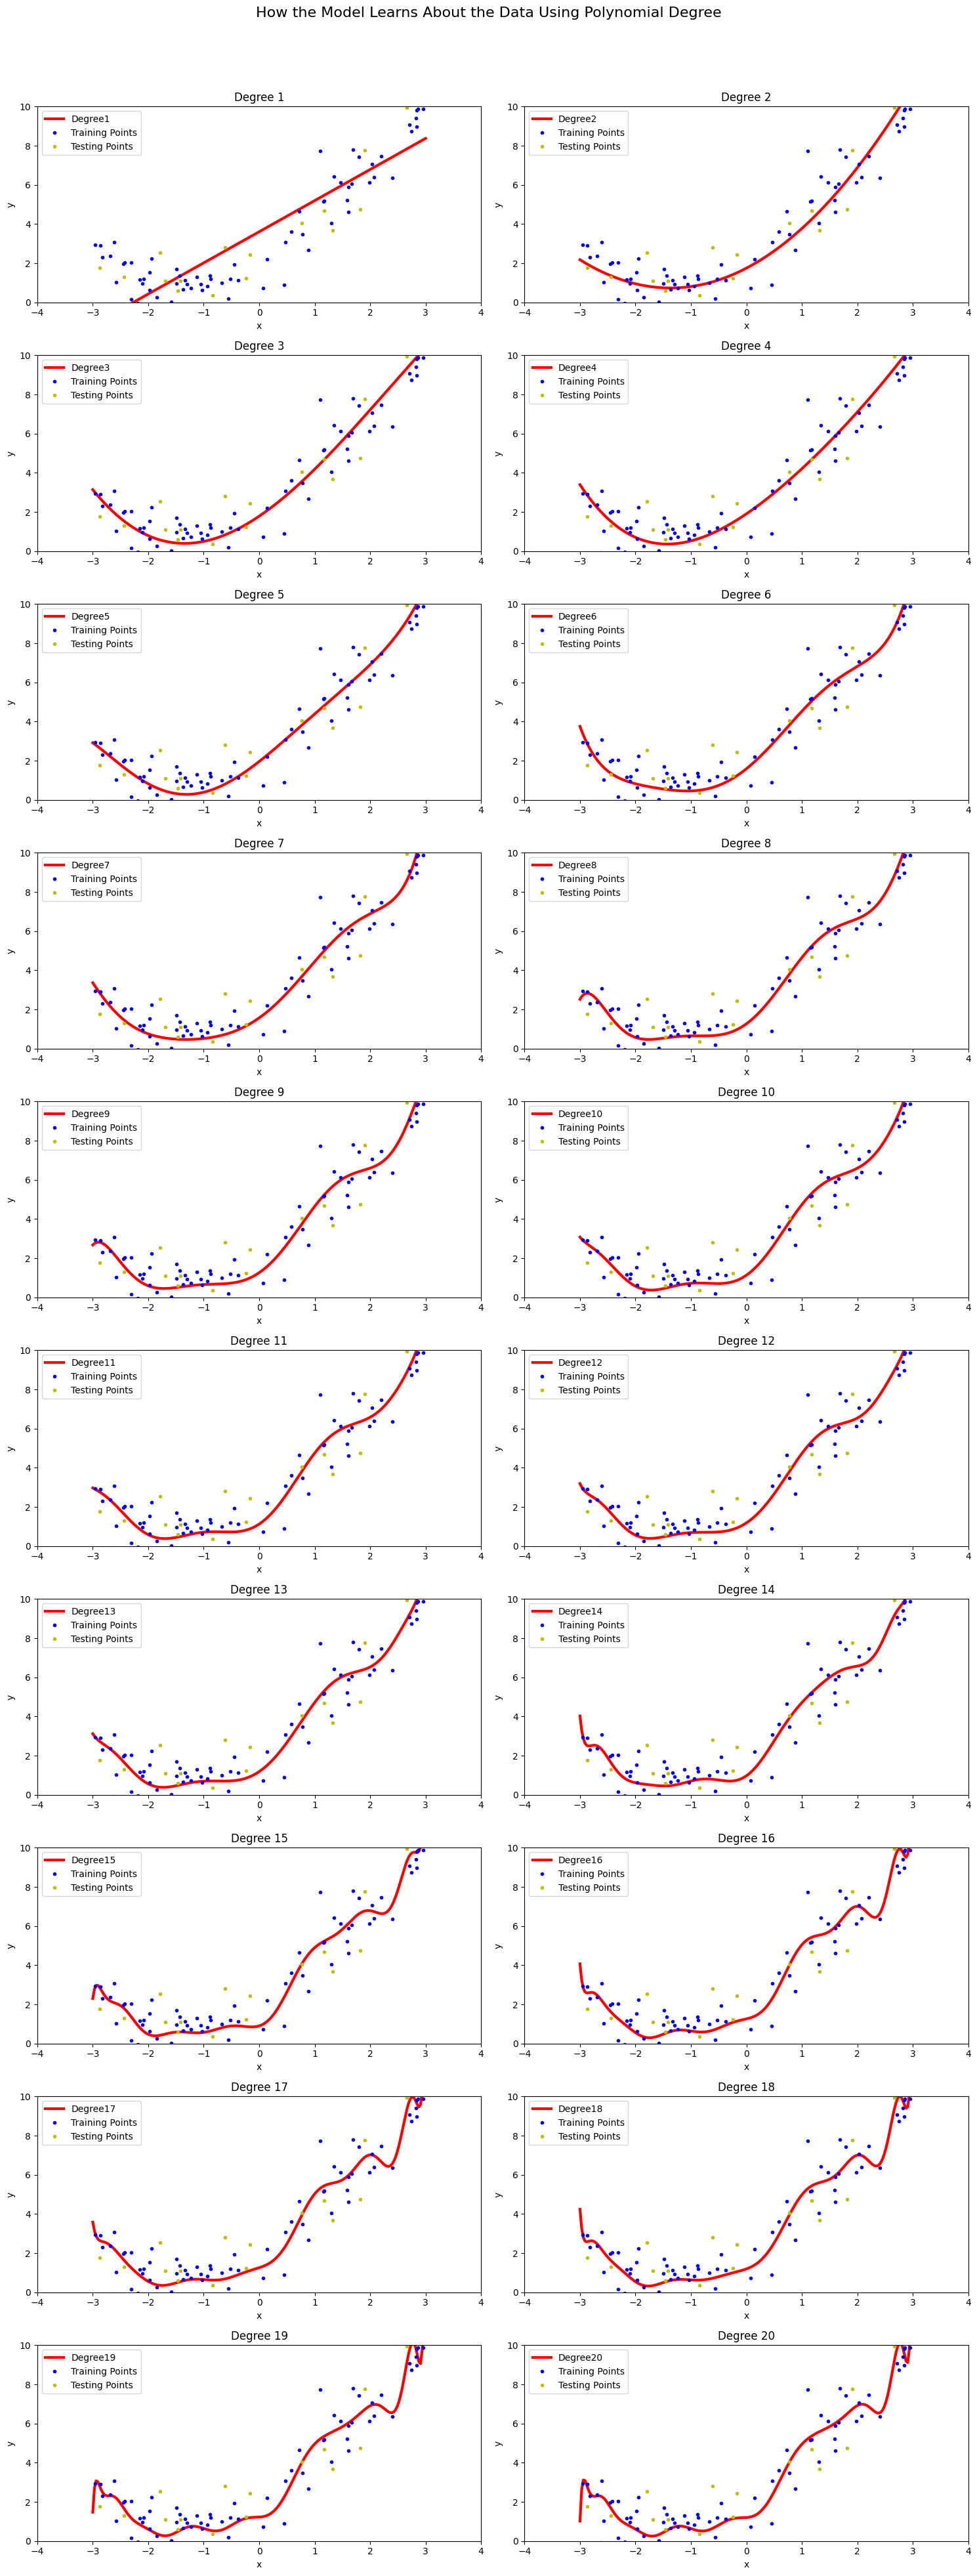

In [174]:
plt.figure(figsize=(15,40))
plt.suptitle('How the Model Learns About the Data Using Polynomial Degree', fontsize=16)

for  i in range(1, 21):
    plt.subplot(10, 2, i)
    poly_regression(i)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()